In [99]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.ensemble import AdaBoostRegressor
abr = DecisionTreeRegressor()
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
import plotly.express as px
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings(action='ignore')

In [100]:
#Load Data
df_surtrain = pd.read_csv (r"C:\Users\Conkl\OneDrive\Desktop\MIT_Hackathon\Surveydata_train_(2).csv")

In [101]:
df_surtrain.head(10)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
5,98800006,1,Needs Improvement,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Good,Excellent,Good,Acceptable,Acceptable,Good,Acceptable,Acceptable,Acceptable,Acceptable
6,98800007,0,Good,Green Car,Excellent,Good,Inconvenient,Good,Good,Good,Good,Good,Excellent,Needs Improvement,Excellent,Acceptable,Good
7,98800008,0,Acceptable,Green Car,NaN,Acceptable,Inconvenient,Excellent,Excellent,Good,Good,Good,Acceptable,Good,Good,Good,Excellent
8,98800009,0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable
9,98800010,0,Needs Improvement,Ordinary,Good,Good,Convenient,Acceptable,Good,Good,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Acceptable


In [102]:
df_surtrain.shape

(94379, 17)

In [103]:
df_surtrain.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [104]:
print(df_surtrain.dtypes)

ID                          int64
Overall_Experience          int64
Seat_Comfort               object
Seat_Class                 object
Arrival_Time_Convenient    object
Catering                   object
Platform_Location          object
Onboard_Wifi_Service       object
Onboard_Entertainment      object
Online_Support             object
Ease_of_Online_Booking     object
Onboard_Service            object
Legroom                    object
Baggage_Handling           object
CheckIn_Service            object
Cleanliness                object
Online_Boarding            object
dtype: object


In [105]:
df_surtrain.describe()
#objects wont show....

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [106]:
df_surtrain['Seat_Comfort'].value_counts()

Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64

In [130]:
answer_map = {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5,
              'Very Inconvenient': 0, 'Inconvenient': 1, 'Manageable': 3, 'Convenient': 4, 'Very Convenient': 5}


In [131]:
df_surtrain = df_surtrain.replace(answer_map)


In [132]:
df_surtrain.head(10)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,2.0,0,5.0,5.0,5.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0,1.0,1,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1,2.0,0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,0,3.0,1,2.0,NaN,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1,3.0,1,3.0,3.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,98800006,1,2.0,1,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0
6,98800007,0,4.0,0,5.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,5.0,2.0,5.0,3.0,4.0
7,98800008,0,3.0,0,NaN,3.0,1.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0
8,98800009,0,2.0,0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0
9,98800010,0,2.0,1,4.0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0


In [133]:
df_surtrain.dtypes

ID                           int64
Overall_Experience           int64
Seat_Comfort               float64
Seat_Class                   int64
Arrival_Time_Convenient    float64
Catering                   float64
Platform_Location          float64
Onboard_Wifi_Service       float64
Onboard_Entertainment      float64
Online_Support             float64
Ease_of_Online_Booking     float64
Onboard_Service            float64
Legroom                    float64
Baggage_Handling           float64
CheckIn_Service            float64
Cleanliness                float64
Online_Boarding            float64
dtype: object

In [134]:
class_map2 = {'Green Car': 0, 'Ordinary': 1}

In [135]:
df_surtrain['Seat_Class'] = df_surtrain['Seat_Class'].replace(class_map2)


In [144]:
df_surtrain.head(10)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,2.0,0,5.0,5.0,5.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0,1.0,1,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1,2.0,0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,0,3.0,1,2.0,2.5,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1,3.0,1,3.0,3.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,98800006,1,2.0,1,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0
6,98800007,0,4.0,0,5.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,5.0,2.0,5.0,3.0,4.0
7,98800008,0,3.0,0,3.5,3.0,1.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0
8,98800009,0,2.0,0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0
9,98800010,0,2.0,1,4.0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0


In [145]:
df_surtrain.isnull().sum()

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [146]:
df_surtrain.dtypes

ID                           int64
Overall_Experience           int64
Seat_Comfort               float64
Seat_Class                   int64
Arrival_Time_Convenient    float64
Catering                   float64
Platform_Location          float64
Onboard_Wifi_Service       float64
Onboard_Entertainment      float64
Online_Support             float64
Ease_of_Online_Booking     float64
Onboard_Service            float64
Legroom                    float64
Baggage_Handling           float64
CheckIn_Service            float64
Cleanliness                float64
Online_Boarding            float64
dtype: object

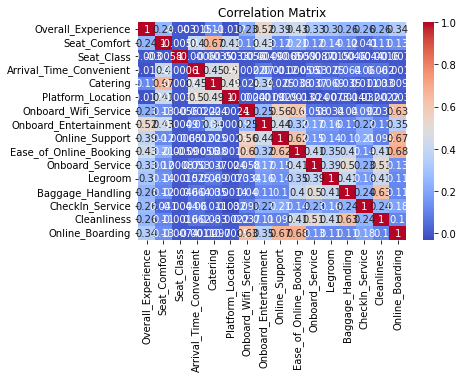

In [147]:

columns = ['Overall_Experience', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
           'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
           'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
           'Cleanliness', 'Online_Boarding']

# Calculate the correlation matrix
corr_matrix = df_surtrain[columns].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [148]:
df_surtrain = df_surtrain.interpolate()

In [149]:
df_surtrain.isnull().sum()

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [150]:
print(df_surtrain['Platform_Location'].dtypes)

float64


In [159]:
df_surtrain.describe()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,9.437900e+04,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000
mean,9.884719e+07,0.546658,2.839244,0.497399,2.995974,2.855233,2.990851,3.248254,3.382543,3.519247,3.470184,3.470857,3.482952,3.696781,3.342428,3.704044,3.351874
std,2.724501e+04,0.497821,1.392223,0.499996,1.490308,1.411312,1.308107,1.319411,1.346091,1.307860,1.305294,1.242771,1.291874,1.155930,1.259991,1.151997,1.298048
min,9.880000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.882360e+07,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,9.884719e+07,1.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,9.887078e+07,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,9.889438e+07,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [151]:
df_surtrain['Platform_Location'].value_counts()

3.0    24180
4.0    21918
2.0    17835
1.0    16450
5.0    13981
3.5        6
2.5        5
1.5        2
0.0        2
Name: Platform_Location, dtype: int64

In [177]:
#Load Data
df_travtrain = pd.read_csv (r"C:\Users\Conkl\OneDrive\Desktop\MIT_Hackathon\Traveldata_train_(2).csv")

In [193]:
df_travtrain.head(10)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0
5,98800006,0.0,1.0,44.0,1.0,1,2810,0.0,0.0
6,98800007,0.0,1.0,56.0,0.0,0,2029,0.0,0.0
7,98800008,0.0,1.0,65.0,0.0,1,853,0.0,3.0
8,98800009,0.0,1.0,22.0,0.0,0,1636,1.0,0.0
9,98800010,0.0,1.0,57.0,1.0,1,306,0.0,0.0


In [179]:
df_travtrain.shape

(94379, 9)

In [180]:
df_travtrain.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [181]:
print(df_travtrain.dtypes)

ID                           int64
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
dtype: object


In [182]:
df_travtrain.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [183]:
df_travtrain['Gender'] = df_travtrain['Gender'].map({'Male': 0, 'Female': 1})

In [184]:
df_travtrain['Customer_Type'] = df_travtrain['Customer_Type'].replace({'Disloyal Customer': 0, 'Loyal Customer': 1})

In [185]:
df_travtrain['Type_Travel'].replace({'Personal Travel': 0, 'Business Travel': 1}, inplace=True)

In [186]:
df_travtrain['Travel_Class'] = df_travtrain['Travel_Class'].replace({'Eco': 0, 'Business': 1})

In [187]:
df_travtrain.describe()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94302.000000,85428.000000,94346.000000,85153.000000,94379.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,0.507041,0.817332,39.419647,0.688373,0.477193,1978.888185,14.647092,15.005222
std,2.724501e+04,0.499953,0.386397,15.116632,0.463161,0.499482,1027.961019,38.138781,38.439409
min,9.880000e+07,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,0.000000,1.000000,27.000000,0.000000,0.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,1.000000,1.000000,40.000000,1.000000,0.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,1.000000,1.000000,51.000000,1.000000,1.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,1.000000,1.000000,85.000000,1.000000,1.000000,6951.000000,1592.000000,1584.000000


In [189]:
df_travtrain.head(10)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0
5,98800006,0.0,1.0,44.0,1.0,1,2810,0.0,0.0
6,98800007,0.0,1.0,56.0,0.0,0,2029,0.0,0.0
7,98800008,0.0,1.0,65.0,0.0,1,853,0.0,3.0
8,98800009,0.0,1.0,22.0,0.0,0,1636,1.0,0.0
9,98800010,0.0,1.0,57.0,1.0,1,306,0.0,0.0


In [190]:
df_travtrain.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [191]:
df_travtrain = df_travtrain.interpolate()

In [192]:
df_travtrain.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                1
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [195]:
df_travtrain['Type_Travel'].value_counts()

1.000000    63007
0.000000    27438
0.500000     3277
0.666667      161
0.333333      161
0.333333      136
0.666667      136
0.750000       24
0.250000       24
0.800000        3
0.600000        2
0.400000        2
0.200000        2
0.833333        1
0.166667        1
0.200000        1
0.400000        1
0.600000        1
Name: Type_Travel, dtype: int64

In [200]:
df_travtrain['Type_Travel'].isnull().sum()

1

In [202]:
df_travtrain.loc[df_travtrain['Type_Travel'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0


In [203]:
df_travtrain['Type_Travel'].fillna(1, inplace=True)

In [204]:
df_travtrain.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [206]:
df_travtrain.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,1.0,1.0,52.0,1.0,1,272,0.0,5.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0


In [208]:
df_surtrain.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,2.0,0,5.0,5.0,5.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0,1.0,1,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1,2.0,0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,0,3.0,1,2.0,2.5,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1,3.0,1,3.0,3.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [228]:
print(df_travtrain.dtypes)


ID                           int64
Gender                     float64
Customer_Type              float64
Age                        float64
Type_Travel                float64
Travel_Class                 int64
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
dtype: object


In [240]:
df_travtrain.shape

(94379, 9)

In [241]:
df_surtrain.shape

(94379, 17)

In [242]:
df_combtrain = pd.merge(df_surtrain, df_travtrain, on='ID')

In [243]:
df_combtrain.shape

(94379, 25)

In [244]:
df_combtrain.head(10)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,2.0,0,5.0,5.0,5.0,4.0,2.0,3.0,...,2.0,1.0,1.0,1.0,52.0,1.0,1,272,0.0,5.0
1,98800002,0,1.0,1,5.0,1.0,2.0,4.0,1.0,4.0,...,4.0,4.0,0.0,1.0,48.0,0.0,0,2200,9.0,0.0
2,98800003,1,2.0,0,2.0,2.0,2.0,2.0,4.0,5.0,...,5.0,5.0,1.0,1.0,43.0,1.0,1,1061,77.0,119.0
3,98800004,0,3.0,1,2.0,2.5,2.0,3.0,2.0,3.0,...,3.0,3.0,1.0,1.0,44.0,1.0,1,780,13.0,18.0
4,98800005,1,3.0,1,3.0,3.0,3.0,2.0,4.0,5.0,...,4.0,4.0,1.0,1.0,50.0,1.0,1,1981,0.0,0.0
5,98800006,1,2.0,1,2.0,3.0,2.0,4.0,5.0,4.0,...,3.0,3.0,0.0,1.0,44.0,1.0,1,2810,0.0,0.0
6,98800007,0,4.0,0,5.0,4.0,1.0,4.0,4.0,4.0,...,3.0,4.0,0.0,1.0,56.0,0.0,0,2029,0.0,0.0
7,98800008,0,3.0,0,3.5,3.0,1.0,5.0,5.0,4.0,...,4.0,5.0,0.0,1.0,65.0,0.0,1,853,0.0,3.0
8,98800009,0,2.0,0,2.0,2.0,2.0,3.0,2.0,3.0,...,2.0,3.0,0.0,1.0,22.0,0.0,0,1636,1.0,0.0
9,98800010,0,2.0,1,4.0,4.0,4.0,3.0,4.0,4.0,...,2.0,3.0,0.0,1.0,57.0,1.0,1,306,0.0,0.0


In [245]:
df_combtrain.describe()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,...,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000
mean,9.884719e+07,0.546658,2.839244,0.497399,2.995974,2.855233,2.990851,3.248254,3.382543,3.519247,...,3.704044,3.351874,0.507030,0.817173,39.418626,0.688442,0.477193,1978.888185,14.646494,15.011464
std,2.724501e+04,0.497821,1.392223,0.499996,1.490308,1.411312,1.308107,1.319411,1.346091,1.307860,...,1.151997,1.298048,0.499847,0.377386,15.115693,0.451983,0.499482,1027.961019,38.130381,38.399929
min,9.880000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,1.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,1.000000,1.000000,40.000000,1.000000,0.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,1.000000,1.000000,51.000000,1.000000,1.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1.000000,1.000000,85.000000,1.000000,1.000000,6951.000000,1592.000000,1584.000000


In [246]:
df_combtrain.isnull().sum()

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [247]:
correlations = df_combtrain.corr()
overall_experience_corr = correlations.loc['Overall_Experience']
print(overall_experience_corr)

ID                         0.001640
Overall_Experience         1.000000
Seat_Comfort               0.243297
Seat_Class                -0.002992
Arrival_Time_Convenient   -0.015170
Catering                   0.113947
Platform_Location         -0.012357
Onboard_Wifi_Service       0.229541
Onboard_Entertainment      0.524730
Online_Support             0.391553
Ease_of_Online_Booking     0.432024
Onboard_Service            0.329344
Legroom                    0.302407
Baggage_Handling           0.257625
CheckIn_Service            0.262517
Cleanliness                0.255544
Online_Boarding            0.339095
Gender                     0.214516
Customer_Type              0.270293
Age                        0.116221
Type_Travel                0.100749
Travel_Class               0.310013
Travel_Distance           -0.041582
Departure_Delay_in_Mins   -0.073723
Arrival_Delay_in_Mins     -0.080057
Name: Overall_Experience, dtype: float64


In [248]:
X = df_combtrain.drop(['Overall_Experience'], axis=1)
y = df_combtrain['Overall_Experience']

# Split data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (66065, 24)
y_train shape: (66065,)
X_test shape: (28314, 24)
y_test shape: (28314,)


In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create X and y variables (assuming 'Overall_Experience' is the target variable)
X = df_combtrain.drop(['ID', 'Overall_Experience'], axis=1)
y = df_combtrain['Overall_Experience']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7303454121635939


In [250]:
# Define the hyperparameter grid to search over
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Create a linear regression model object
model = LinearRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and create a new model with them
best_params = grid_search.best_params_
best_model = LinearRegression(**best_params)

# Train the new model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy:", accuracy)

Accuracy: 0.8355583810129265


In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [255]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define the model
model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model using R-squared score
score = r2_score(y_test, y_pred)
print("R-squared score:", score)

R-squared score: 0.8423649124014408


In [263]:
regression_models = [lr, rfr, gbr, dtr, abr]
score_train = []
score_test = []
rmse = []

for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train, y_train))
    score_test.append(model.score(X_test, y_test))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [264]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor','Lasso Regression']

scores = pd.DataFrame([model_names,score_train,score_test,rmse])
scores

,0,1,2,3,4,5
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor,Lasso Regression
1,0.472304,0.978595,0.737975,1.0,1.0,None
2,0.476044,0.848583,0.734842,0.696663,0.697517,None
3,0.360474,0.193782,0.256436,0.274277,0.27389,None


In [265]:
#Rotate scores to make easier to compare
scores = scores.transpose()
scores.columns = [ 'Model','Training set Accuracy','Testing set Accuracy','RMSE']
scores

,Model,Training set Accuracy,Testing set Accuracy,RMSE
0,Linear Regression,0.472304,0.476044,0.360474
1,Random Forest Regressor,0.978595,0.848583,0.193782
2,Gradient Boosting Regressor,0.737975,0.734842,0.256436
3,Decision Tree Regressor,1.0,0.696663,0.274277
4,AdaBoostRegressor,1.0,0.697517,0.27389
5,Lasso Regression,None,None,None


In [266]:
lasso = Lasso()

In [268]:
lasso.fit(X_train,y_train)

Lasso()

In [274]:
regression_models = [lr, rfr, gbr, dtr, abr]
score_train = []
score_test = []
rmse = []

for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train, y_train))
    score_test.append(model.score(X_test, y_test))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [275]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor','Lasso Regression']

scores = pd.DataFrame([model_names,score_train,score_test,rmse])
scores

,0,1,2,3,4,5
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor,Lasso Regression
1,0.472304,0.978545,0.737975,1.0,1.0,None
2,0.476044,0.847867,0.734842,0.696378,0.697802,None
3,0.360474,0.19424,0.256436,0.274406,0.273761,None


In [276]:
#Rotate scores to make easier to compare
scores = scores.transpose()
scores.columns = [ 'Model','Training set Accuracy','Testing set Accuracy','RMSE']
scores

,Model,Training set Accuracy,Testing set Accuracy,RMSE
0,Linear Regression,0.472304,0.476044,0.360474
1,Random Forest Regressor,0.978545,0.847867,0.19424
2,Gradient Boosting Regressor,0.737975,0.734842,0.256436
3,Decision Tree Regressor,1.0,0.696378,0.274406
4,AdaBoostRegressor,1.0,0.697802,0.273761
5,Lasso Regression,None,None,None


In [278]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dtr, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [280]:
dtr_best = DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=10)

dtr_best.fit(X_train, y_train)

y_pred = dtr_best.predict(X_test)

score_train = dtr_best.score(X_train, y_train)
score_test = dtr_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.8833
Test score: 0.7928
RMSE: 0.23


In [282]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [283]:
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

rfr_best = RandomForestRegressor(**best_params)

rfr_best.fit(X_train, y_train)

y_pred = rfr_best.predict(X_test)

score_train = rfr_best.score(X_train, y_train)
score_test = rfr_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.9687
Test score: 0.8496
RMSE: 0.19


In [284]:
param_grid = {'normalize': [True, False]}

# Define the model
model = LinearRegression()

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'normalize': False}


In [285]:
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define the model
model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [286]:
gbr_best = GradientBoostingRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200)

# Fit the model on the training data
gbr_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr_best.predict(X_test)

# Calculate the scores and RMSE
score_train = gbr_best.score(X_train, y_train)
score_test = gbr_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.9565
Test score: 0.8524
RMSE: 0.19


In [287]:
gbr_best = GradientBoostingRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200, learning_rate=0.1)

# Fit the model on the training data
gbr_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr_best.predict(X_test)

# Calculate the scores and RMSE
score_train = gbr_best.score(X_train, y_train)
score_test = gbr_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.9576
Test score: 0.8518
RMSE: 0.19


In [288]:
dtr = DecisionTreeRegressor()

In [289]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [3, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}

In [290]:
adaboost = AdaBoostRegressor(base_estimator=dtr, random_state=42)
grid_search = GridSearchCV(adaboost, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 10, 'learning_rate': 0.01, 'n_estimators': 200}


In [292]:

# Define the base estimator
base_estimator = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)

# Define the AdaBoost Regressor with the specified parameters
abr_best = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=200, learning_rate=0.01)

# Fit the model on the training data
abr_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = abr_best.predict(X_test)

# Calculate the scores and RMSE
score_train = abr_best.score(X_train, y_train)
score_test = abr_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.8458
Test score: 0.8194
RMSE: 0.21


In [293]:
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [100, 500, 1000, 5000]}

# Define the model
model = Lasso()

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model using R-squared score
score = r2_score(y_test, y_pred)
print("R-squared score:", score)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

R-squared score: 0.47594644795181706
Best hyperparameters: {'alpha': 0.001, 'max_iter': 100}


In [294]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [100, 500, 1000, 5000]
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"R-squared score: {grid_search.best_score_:.4f}")

# Train the model on the training set with the best hyperparameters
lasso_best = Lasso(**grid_search.best_params_)
lasso_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_best.predict(X_test)

# Evaluate the model using R-squared score
score = r2_score(y_test, y_pred)
print(f"Test R-squared score: {score:.4f}")

Best hyperparameters: {'alpha': 0.0001, 'max_iter': 100}
R-squared score: 0.4717
Test R-squared score: 0.4760


In [295]:

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000]
}

# Create the Lasso Regression model
lasso = Lasso()

# Define the GridSearchCV with the specified parameters
grid_search = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Define the Lasso Regression model with the best hyperparameters
lasso_best = Lasso(**grid_search.best_params_)

# Fit the model on the training data
lasso_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_best.predict(X_test)

# Calculate the scores and RMSE
score_train = lasso_best.score(X_train, y_train)
score_test = lasso_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

{'alpha': 0.001, 'max_iter': 100}
Train score: 0.4722
Test score: 0.4759
RMSE: 0.36


In [297]:
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

rfr_best = RandomForestRegressor(**best_params)

rfr_best.fit(X_train, y_train)

y_pred = rfr_best.predict(X_test)

score_train = rfr_best.score(X_train, y_train)
score_test = rfr_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.9691
Test score: 0.8499
RMSE: 0.19


In [298]:
best_params = {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}

rfr_best = RandomForestRegressor(**best_params)

rfr_best.fit(X_train, y_train)

y_pred = rfr_best.predict(X_test)

score_train = rfr_best.score(X_train, y_train)
score_test = rfr_best.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.9793
Test score: 0.8502
RMSE: 0.19
